# Predictive Modeling for Customer Churn


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
# Importing Data set
train = pd.read_csv("bank.csv")
train.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
train.shape

(4521, 17)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### HANDLING MISSING VALUES

In [5]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 data set do not have any missing value.

## Creating Dummy variables

In [6]:
dummy = pd.get_dummies(train[['job','marital','default','education','housing','loan','default']], drop_first=True)
train['y'].replace('no',0,inplace=True)
train['y'].replace('yes',1,inplace=True)
# Add the results to the master dataframe
train = pd.concat([train, dummy], axis=1)

In [7]:
train["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

<AxesSubplot:>

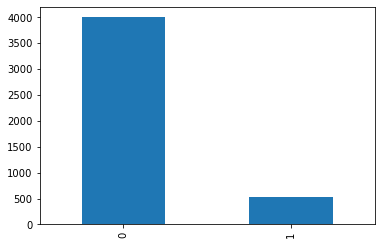

In [8]:
train['y'].value_counts().plot(kind='bar')

In [9]:
train = train.drop(['marital','default','education','housing','loan','default','contact','month','job','poutcome'],1)
train.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,job_unknown,marital_married,marital_single,default_yes,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,default_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [10]:
X= train.drop(['y'],axis=1)
y=train['y']

In [11]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unknown,marital_married,marital_single,default_yes,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,default_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [12]:
y.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: y, dtype: int64

### Checking for Outliers

<AxesSubplot:xlabel='y', ylabel='previous'>

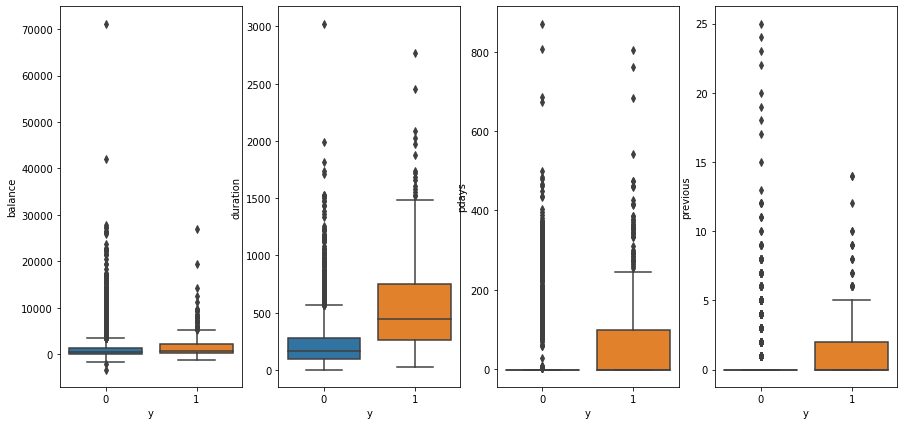

In [13]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
sns.boxplot(y=train['balance'],x=train['y'],ax=axes[0])
sns.boxplot(y=train['duration'],x=train['y'],ax=axes[1])    
sns.boxplot(y=train['pdays'],x=train['y'],ax=axes[2])    
sns.boxplot(y=train['previous'],x=train['y'],ax=axes[3]) 

In [14]:
train['balance']=np.log(train['balance'])
train['duration']=np.log(train['duration'])    
train['pdays']=np.log(train['pdays'])    
train['previous']=np.log(train['previous'])  

### Spliting the Data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

X_train[['duration','balance']] = scaler.fit_transform(X_train[['duration','balance']])

X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unknown,marital_married,marital_single,default_yes,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,default_yes
2085,33,-0.490292,28,-0.427557,3,-1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1239,28,0.905722,5,-0.225129,2,-1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
130,41,-0.410863,18,-0.292605,3,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2345,26,-0.299337,30,-0.221381,5,239,3,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1296,58,-0.464680,16,1.570479,1,-1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


### Over Sampling

In [18]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", X)
print("Shape of y:", y)

Shape of x:        age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0      30     1787   19        79         1     -1         0                0   
1      33     4789   11       220         1    339         4                0   
2      35     1350   16       185         1    330         1                0   
3      30     1476    3       199         4     -1         0                0   
4      59        0    5       226         1     -1         0                1   
...   ...      ...  ...       ...       ...    ...       ...              ...   
7995   29     1011   14       230         1     75         0                0   
7996   46     2263   10       170         2     -1         0                0   
7997   47     3322   15       578         3     81         1                0   
7998   39       23    1       231         2     -1         0                0   
7999   52     3023   18      1129         7     -1         0                0   

      job_entr

### Checking For Coorelation

In [19]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

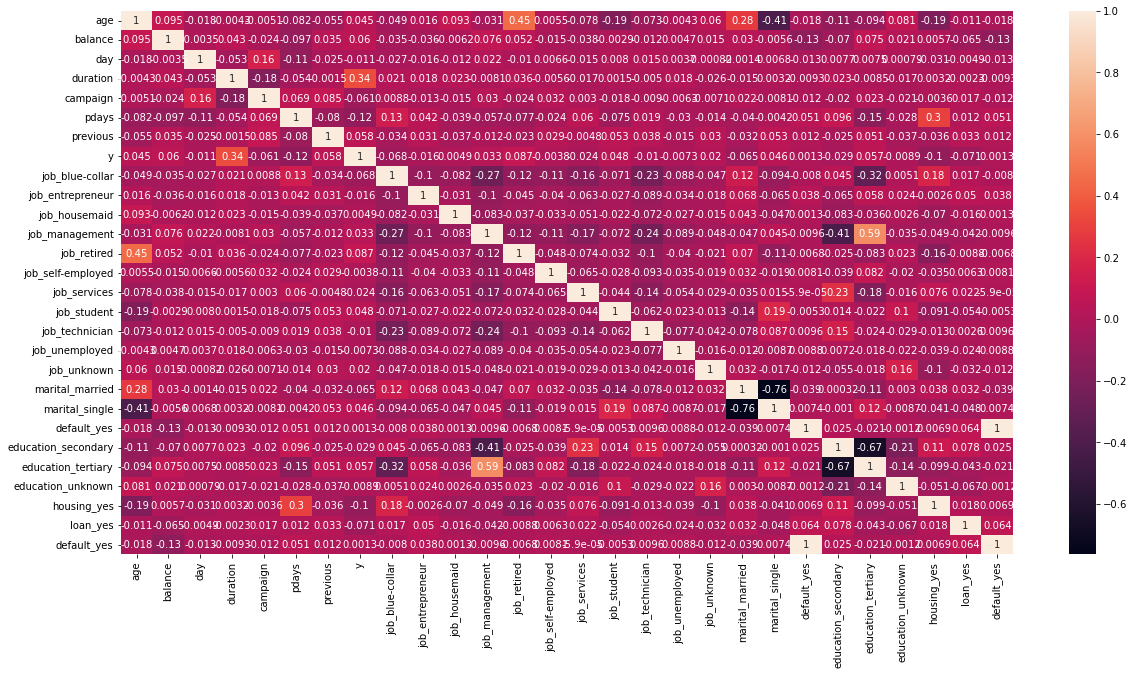

In [20]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train.corr(),annot = True)
plt.show()

### Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [22]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [23]:
rfe.support_

array([False, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True, False])

In [24]:
# Checking for top variable
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 2),
 ('balance', False, 2),
 ('day', False, 2),
 ('duration', True, 1),
 ('campaign', False, 2),
 ('pdays', False, 2),
 ('previous', False, 2),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 2),
 ('job_management', False, 2),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', False, 2),
 ('job_technician', True, 1),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 2),
 ('marital_married', True, 1),
 ('marital_single', True, 1),
 ('default_yes', False, 2),
 ('education_secondary', False, 2),
 ('education_tertiary', False, 2),
 ('education_unknown', True, 1),
 ('housing_yes', True, 1),
 ('loan_yes', True, 1),
 ('default_yes', False, 2)]

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['duration', 'job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_unknown', 'housing_yes',
       'loan_yes'],
      dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_housemaid', 'job_management', 'job_student', 'job_unknown',
       'default_yes', 'education_secondary', 'education_tertiary',
       'default_yes'],
      dtype='object')

### Assessing the model with StatsModels


In [27]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3150
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -923.95
Date:                Sat, 04 Feb 2023   Deviance:                       1847.9
Time:                        17:46:22   Pearson chi2:                 4.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1384
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2494      0.186     -6.729      0.000      -1.613      -0.886
duration              0.9741      0.057     17.027      0.000       0.862       1.086
job_blue-collar      -0.7757      0.193     -4.027      0.000      -1.153      -0.398
job_entrepreneur     -1.0347      0.421     -2.459      0.014      -1.859      -0.210
job_retired           0.4305      0.230      1.874      0.061      -0.020       0.881
job_self-employed    -0.7401      0.370     -2.001      0.045      -1.465      -0.015
job_services         -0.3491      0.229     -1.522      0.128      -0.799       0.101
job_technician       -0.4078      0.181     -2.255      0.024      -0.762      -0.053
job_unemployed       -1.0538      0.445     -2.367      0.018      -1.926      -0.181
marital_married      -0.3614      0.181     -1.994      0.046      -0.717      -0.006
marital_single       -0.1208      0.199     -0.608      0.543      -0.510       0.268
education_unknown    -0.4460      0.332     -1.343      0.179      -1.097       0.205
housing_yes          -0.7321      0.130     -5.616      0.000      -0.988      -0.477
loan_yes             -0.9382      0.217     -4.333      0.000      -1.363      -0.514
=====================================================================================
"""

In [28]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2085    0.028329
1239    0.017368
130     0.032180
2345    0.026458
1296    0.246817
318     0.114371
2461    0.107229
1764    0.167910
2636    0.132616
2578    0.063736
dtype: float64

In [29]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02832853, 0.01736821, 0.03218045, 0.02645837, 0.24681712,
       0.11437123, 0.10722919, 0.16791042, 0.13261609, 0.06373614])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [30]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.028329
1,0,0.017368
2,0,0.032180
3,0,0.026458
4,0,0.246817


### Creating new column 'predicted' with 1 if Coverted_Prob > 0.5 else 0

In [31]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.028329,0
1,0,0.017368,0
2,0,0.032180,0
3,0,0.026458,0
4,0,0.246817,0


### Plotting the ROC Curve

In [32]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [33]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

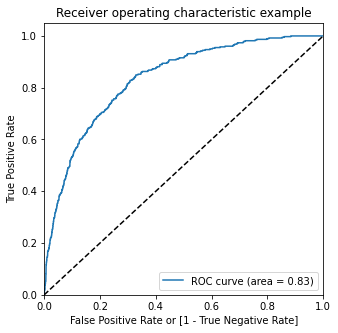

In [34]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Checking VIF

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,marital_married,2.52
11,housing_yes,2.24
1,job_blue-collar,1.55
9,marital_single,1.52
6,job_technician,1.37
5,job_services,1.21
12,loan_yes,1.18
3,job_retired,1.10
2,job_entrepreneur,1.09
4,job_self-employed,1.09


No High VIF value found in the variable. So we are good to go.

In [37]:
#Checking For High P-Value
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3150
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -923.95
Date:                Sat, 04 Feb 2023   Deviance:                       1847.9
Time:                        17:46:24   Pearson chi2:                 4.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1384
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2494      0.186     -6.729      0.000      -1.613      -0.886
duration              0.9741      0.057     17.027      0.000       0.862       1.086
job_blue-collar      -0.7757      0.193     -4.027      0.000      -1.153      -0.398
job_entrepreneur     -1.0347      0.421     -2.459      0.014      -1.859      -0.210
job_retired           0.4305      0.230      1.874      0.061      -0.020       0.881
job_self-employed    -0.7401      0.370     -2.001      0.045      -1.465      -0.015
job_services         -0.3491      0.229     -1.522      0.128      -0.799       0.101
job_technician       -0.4078      0.181     -2.255      0.024      -0.762      -0.053
job_unemployed       -1.0538      0.445     -2.367      0.018      -1.926      -0.181
marital_married      -0.3614      0.181     -1.994      0.046      -0.717      -0.006
marital_single       -0.1208      0.199     -0.608      0.543      -0.510       0.268
education_unknown    -0.4460      0.332     -1.343      0.179      -1.097       0.205
housing_yes          -0.7321      0.130     -5.616      0.000      -0.988      -0.477
loan_yes             -0.9382      0.217     -4.333      0.000      -1.363      -0.514
=====================================================================================
"""

No High P-Value is found.

## Model Building

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
X.shape

(8000, 27)

In [40]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Evaluting Model on Train Data

In [42]:
print(confusion_matrix(y_train, y_train_pred))
print()
print(classification_report(y_train, y_train_pred))
print()
print('ROC AUC Score:',roc_auc_score(y_train,y_train_pred))
print()
print('F1 Score:',f1_score(y_train,y_train_pred))
print()
print('Accuracy Score:',accuracy_score(y_train,y_train_pred))

[[2732   53]
 [ 305   74]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2785
           1       0.58      0.20      0.29       379

    accuracy                           0.89      3164
   macro avg       0.74      0.59      0.62      3164
weighted avg       0.86      0.89      0.86      3164


ROC AUC Score: 0.5881100694921436

F1 Score: 0.29249011857707513

Accuracy Score: 0.8868520859671302


### Evaluting Model on Test Data

In [43]:
print(confusion_matrix(y_test, y_test_pred))
print()
print(classification_report(y_test, y_test_pred))
print()
print('ROC AUC Score:',roc_auc_score(y_test,y_test_pred))
print()
print('F1 Score:',f1_score(y_test,y_test_pred))
print()
print('Accuracy Score:',accuracy_score(y_test,y_test_pred))

[[ 208 1007]
 [   7  135]]

              precision    recall  f1-score   support

           0       0.97      0.17      0.29      1215
           1       0.12      0.95      0.21       142

    accuracy                           0.25      1357
   macro avg       0.54      0.56      0.25      1357
weighted avg       0.88      0.25      0.28      1357


ROC AUC Score: 0.5609488204949863

F1 Score: 0.2102803738317757

Accuracy Score: 0.2527634487840825


### Building Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluting model on Train data

In [45]:
print("Train Results")
print()
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print()
print(classification_report(y_train, pred_train))
print()
print('ROC AUC Score:',roc_auc_score(y_train,pred_train))
print()
print('F1 Score:',f1_score(y_train,pred_train))
print()
print('Accuracy Score:',accuracy_score(y_train,pred_train))

Train Results

[[2785    0]
 [   0  379]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2785
           1       1.00      1.00      1.00       379

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


ROC AUC Score: 1.0

F1 Score: 1.0

Accuracy Score: 1.0


### Evaluting model on Test data

In [46]:
print("Test Results")
print()
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print()
print(classification_report(y_test, pred_test))
print()
print()
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))
print()
print('F1 Score:',f1_score(y_test,pred_test))
print()
print('Accuracy Score:',accuracy_score(y_test,pred_test))


Test Results

[[838 377]
 [109  33]]

              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1215
           1       0.08      0.23      0.12       142

    accuracy                           0.64      1357
   macro avg       0.48      0.46      0.45      1357
weighted avg       0.80      0.64      0.71      1357



ROC AUC Score: 0.46105315017678083

F1 Score: 0.11956521739130434

Accuracy Score: 0.6418570375829035


### Building Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=20,
                       n_jobs=-1, random_state=42)

In [50]:
sample_tree = rf.estimators_[10]

### Evaluting Model on Train Data 

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [52]:
print("Train Results")
y_train_pred_rf = rf.predict(X_train)


print(confusion_matrix(y_train, y_train_pred_rf))
print()
print(classification_report(y_train, y_train_pred_rf))
print()
print('ROC AUC Score:',roc_auc_score(y_train,y_train_pred_rf))
print()
print('F1 Score:',f1_score(y_train,y_train_pred_rf))
print()
print('Accuracy Score:',accuracy_score(y_train,y_train_pred_rf))

Train Results
[[2781    4]
 [ 371    8]]

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2785
           1       0.67      0.02      0.04       379

    accuracy                           0.88      3164
   macro avg       0.77      0.51      0.49      3164
weighted avg       0.86      0.88      0.83      3164


ROC AUC Score: 0.5098359568551845

F1 Score: 0.04092071611253197

Accuracy Score: 0.8814791403286979


### Evaluting Model on Test Data 

In [53]:
print("Test Results")
y_test_pred_rf = rf.predict(X_test)


print(confusion_matrix(y_test, y_test_pred_rf))
print()
print(classification_report(y_test, y_test_pred_rf))
print()
print('ROC AUC Score:',roc_auc_score(y_test,y_test_pred_rf))
print()
print('F1 Score:',f1_score(y_test,y_test_pred_rf))
print()
print('Accuracy Score:',accuracy_score(y_test,y_test_pred_rf))

Test Results
[[1209    6]
 [ 133    9]]

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1215
           1       0.60      0.06      0.11       142

    accuracy                           0.90      1357
   macro avg       0.75      0.53      0.53      1357
weighted avg       0.87      0.90      0.86      1357


ROC AUC Score: 0.5292210050426013

F1 Score: 0.11464968152866241

Accuracy Score: 0.8975681650700074


In [54]:
test=pd.read_csv("test.csv")
test.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [55]:
dummy = pd.get_dummies(test[['job','poutcome','marital','default','education','housing','loan','default','contact','month']], drop_first=True)

# Add the results to the master dataframe
test = pd.concat([test, dummy], axis=1)

In [56]:
test = test.drop(['marital','default','education','housing','loan','default','contact','month','job','poutcome','age'],1)
test.head()

,Id,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unknown,marital_married,marital_single,default_yes,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,default_yes
0,1,231,5,139,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,3,2,5,380,1,-1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
3,4,121,5,50,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [57]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Id                   427 non-null    int64
 1   balance              427 non-null    int64
 2   day                  427 non-null    int64
 3   duration             427 non-null    int64
 4   campaign             427 non-null    int64
 5   pdays                427 non-null    int64
 6   previous             427 non-null    int64
 7   job_blue-collar      427 non-null    uint8
 8   job_entrepreneur     427 non-null    uint8
 9   job_housemaid        427 non-null    uint8
 10  job_management       427 non-null    uint8
 11  job_retired          427 non-null    uint8
 12  job_self-employed    427 non-null    uint8
 13  job_services         427 non-null    uint8
 14  job_student          427 non-null    uint8
 15  job_technician       427 non-null    uint8
 16  job_unemployed       427 n

In [58]:
y_pred_logistic_pred= logreg.predict(test)
y_pred_random_pred= rf.predict(test)

In [59]:
test['y'] = y_pred_random_pred

In [60]:
test=test.drop(['balance','day','duration','campaign','pdays','previous','job_blue-collar','job_entrepreneur',
               'job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student',
               'job_technician','job_unemployed','job_unknown','marital_married','marital_single','default_yes',
               'education_secondary','education_tertiary','education_unknown','housing_yes','loan_yes','default_yes'],axis=1)

In [61]:
test.head(25)

,Id,y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [62]:
test.to_csv("sample_submission.csv",index=False)

# ANALYSIS

I have used different Machine Learning Models to detect that how many people are churn or not.

To choose which variable is best for model feature selection was used. Top variable comes out are - 
'duration', 'job_blue-collar', 'job_entrepreneur', 'job_retired','job_self-employed', 'job_services', 'job_technician', 'job_unemployed','marital_married', 'marital_single', 'education_unknown', 'housing_yes','loan_yes.

The Model Built are Logistic Regression Model, Decision tree and Random Forest. Random forest and Decision Tree modelperform best on train as well as on test data.

The performance of the model is checked by ROC AUC score, Accuracy, F1 Score, Precision and recall.

### FLOW OF ANALYSIS

1. Data cleaning and data manipulation.
  - Check and handle duplicate data.
  - Check and handle NA values and missing values.
  - Drop columns. If it contains large amount of missing values and not used for analysis.
  - Imputation of the values.
2. EDA
  - Univariate data analysis,values_count,distribution of variable.
  - Bivariate data analysis,correlation coefficients and pattern between the variable.
  - Feature Scaling and Creating Dummy Variable.
  - Performed Oversampling.
  - Building Model: Logistic regression, Decision Tree, Random forest Model used for the model making and prediction.
  - Validation of the model.